# Import PyTorch and TensorFlow

In [1]:
# %tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.0.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x, y

## Data Visualization

Text(0, 0.5, 'y')

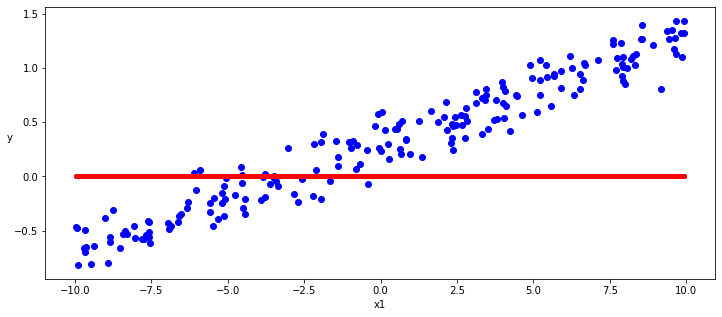

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model Training

In [7]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [8]:
epochs = 500
learning_rate = 0.001


class LinearRegression:
    def __init__(self):
        self.params = {
            "m" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        
    # Forward propagation
    def __call__(self,x): 
        y = self.params["m"] * x + self.params["b"]
        return y
    # Loss function
    def loss_func(self,y_true,y_pred):  
        return tf.reduce_mean((y_true - y_pred)**2/2)

model = LinearRegression()
for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = squared_error(predictions, y)
    dloss_dw,dloss_db = tape.gradient(loss, [model.params["m"], model.params["b"]])
    # adjusting 
    model.params["m"].assign(model.params["m"] - learning_rate*dloss_dw)
    model.params["b"].assign(model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.1254921704530716
Step 40, Loss 0.09660688042640686
Step 60, Loss 0.08951659500598907
Step 80, Loss 0.08412571251392365
Step 100, Loss 0.07921654731035233
Step 120, Loss 0.07468797266483307
Step 140, Loss 0.07050701230764389
Step 160, Loss 0.0666467696428299
Step 180, Loss 0.06308262050151825
Step 200, Loss 0.059791870415210724
Step 220, Loss 0.056753549724817276
Step 240, Loss 0.05394827947020531
Step 260, Loss 0.05135820433497429
Step 280, Loss 0.048966795206069946
Step 300, Loss 0.046758826822042465
Step 320, Loss 0.04472022131085396
Step 340, Loss 0.04283798858523369
Step 360, Loss 0.04110012948513031
Step 380, Loss 0.03949559107422829
Step 400, Loss 0.03801412507891655
Step 420, Loss 0.03664629906415939
Step 440, Loss 0.03538339212536812
Step 460, Loss 0.03421735763549805
Step 480, Loss 0.033140767365694046


## Data Visualization

Text(0, 0.5, 'y')

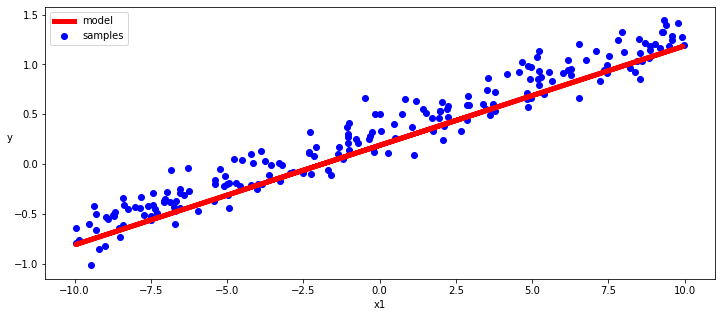

In [9]:
x_train, y_train = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x_train,y_train, c = "b", label="samples")
ax.plot(x,model.params["m"]*x+model.params["b"],"-r",linewidth = 5.0,label = "model")
ax.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# PyTorch Model Training